# Heart Failure Prediction Assignment

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [28]:
df=pd.read_csv("/content/heart failure.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [29]:
df.shape

(299, 13)

In [30]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Objective
The goal of this assignment is to analyze the **heart failure clinical records** dataset and build a machine learning model to predict the occurrence of a **death event** in patients with heart failure. You will perform exploratory data analysis (EDA), visualize trends, and apply classification models to predict the target variable.

## Dataset Overview

The dataset consists of 13 variables, each representing clinical features and demographic information of heart failure patients:

1. **age**: Age of the patient (years)
2. **anaemia**: Whether the patient has anaemia (0: no, 1: yes)
3. **creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes**: Whether the patient has diabetes (0: no, 1: yes)
5. **ejection_fraction**: Percentage of blood leaving the heart with each contraction (%)
6. **high_blood_pressure**: Whether the patient has high blood pressure (0: no, 1: yes)
7. **platelets**: Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium**: Level of serum sodium in the blood (mEq/L)
10. **sex**: Gender of the patient (1: male, 0: female)
11. **smoking**: Whether the patient smokes (0: no, 1: yes)
12. **time**: Follow-up period (days)
13. **DEATH_EVENT**: Whether the patient died during the follow-up period (0: no, 1: yes) [Target Variable]

## Instructions

### 1. Data Exploration (EDA)
- **Task 1**: Load the dataset using pandas and display the first few rows.
- **Task 2**: Check for missing values and clean the data if necessary.
- **Task 3**: Generate summary statistics for the numerical columns.
- **Task 4**: Visualize the distribution of the target variable (`DEATH_EVENT`).
- **Task 5**: Plot histograms or box plots for continuous variables like `age`, `creatinine_phosphokinase`, `ejection_fraction`, `serum_creatinine`, etc.

### 2. Data Visualization
- **Task 6**: Create a correlation matrix heatmap to understand the relationships between the features.
- **Task 7**: Create count plots or bar charts for categorical variables like `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`.
- **Task 8**: Create scatter plots or pair plots for continuous variables like `age` vs `ejection_fraction`, `serum_creatinine`, etc., colored by `DEATH_EVENT`.

### 3. Model Building
- **Task 9**: Split the dataset into features (`X`) and the target variable (`y = DEATH_EVENT`).
- **Task 10**: Perform train-test splitting (70% training, 30% testing) using `train_test_split` from sklearn.
- **Task 11**: Standardize the continuous features using `StandardScaler`.

### 4. Model Training and Evaluation
- **Task 12**: Train a Logistic Regression model and evaluate it using accuracy, precision, recall, and F1-score.
- **Task 13**: Train a K-Nearest Neighbors (KNN) model and evaluate its performance.
- **Task 14**: Train a Decision Tree Classifier and compare its performance with other models.

### 5. Cross Validation
- **Task 15**: Perform K-Fold Cross-Validation (with 5 folds) on the Logistic Regression model to evaluate its performance.
- **Task 16**: Perform Stratified K-Fold Cross-Validation to ensure class balance during cross-validation.

### 6. Model Improvement
- **Task 17**: Use Grid Search or Randomized Search to tune the hyperparameters of the KNN and Decision Tree models.
- **Task 18**: Plot the ROC curves and calculate the AUC for all models to compare their performance visually.

### 7. Conclusion
- **Task 19**: Summarize your findings and explain which model performed best and why. Consider which features were most important for predicting the death event.
- **Task 20**: Suggest potential improvements or next steps for the analysis.

In [31]:
# TASK 2
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [32]:
# TASK 3
print(df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

## Submission Instructions:
- Submit your notebook file to github with the completed analysis.
- Ensure that the notebook is well-documented with explanations for each step.
- Include visualizations and comments on the results of each model.
- Submit github link only

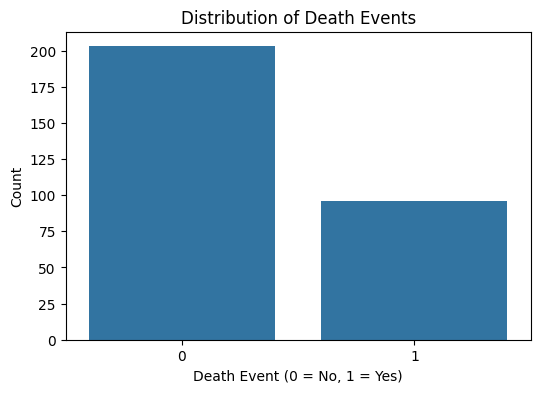

DEATH_EVENT
0    67.892977
1    32.107023
Name: proportion, dtype: float64


In [33]:
# @title Rest Of The Tasks
# TASK 4
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of Death Events')
plt.xlabel('Death Event (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Calculate percentage
death_percentage = df['DEATH_EVENT'].value_counts(normalize=True) * 100
print(death_percentage)

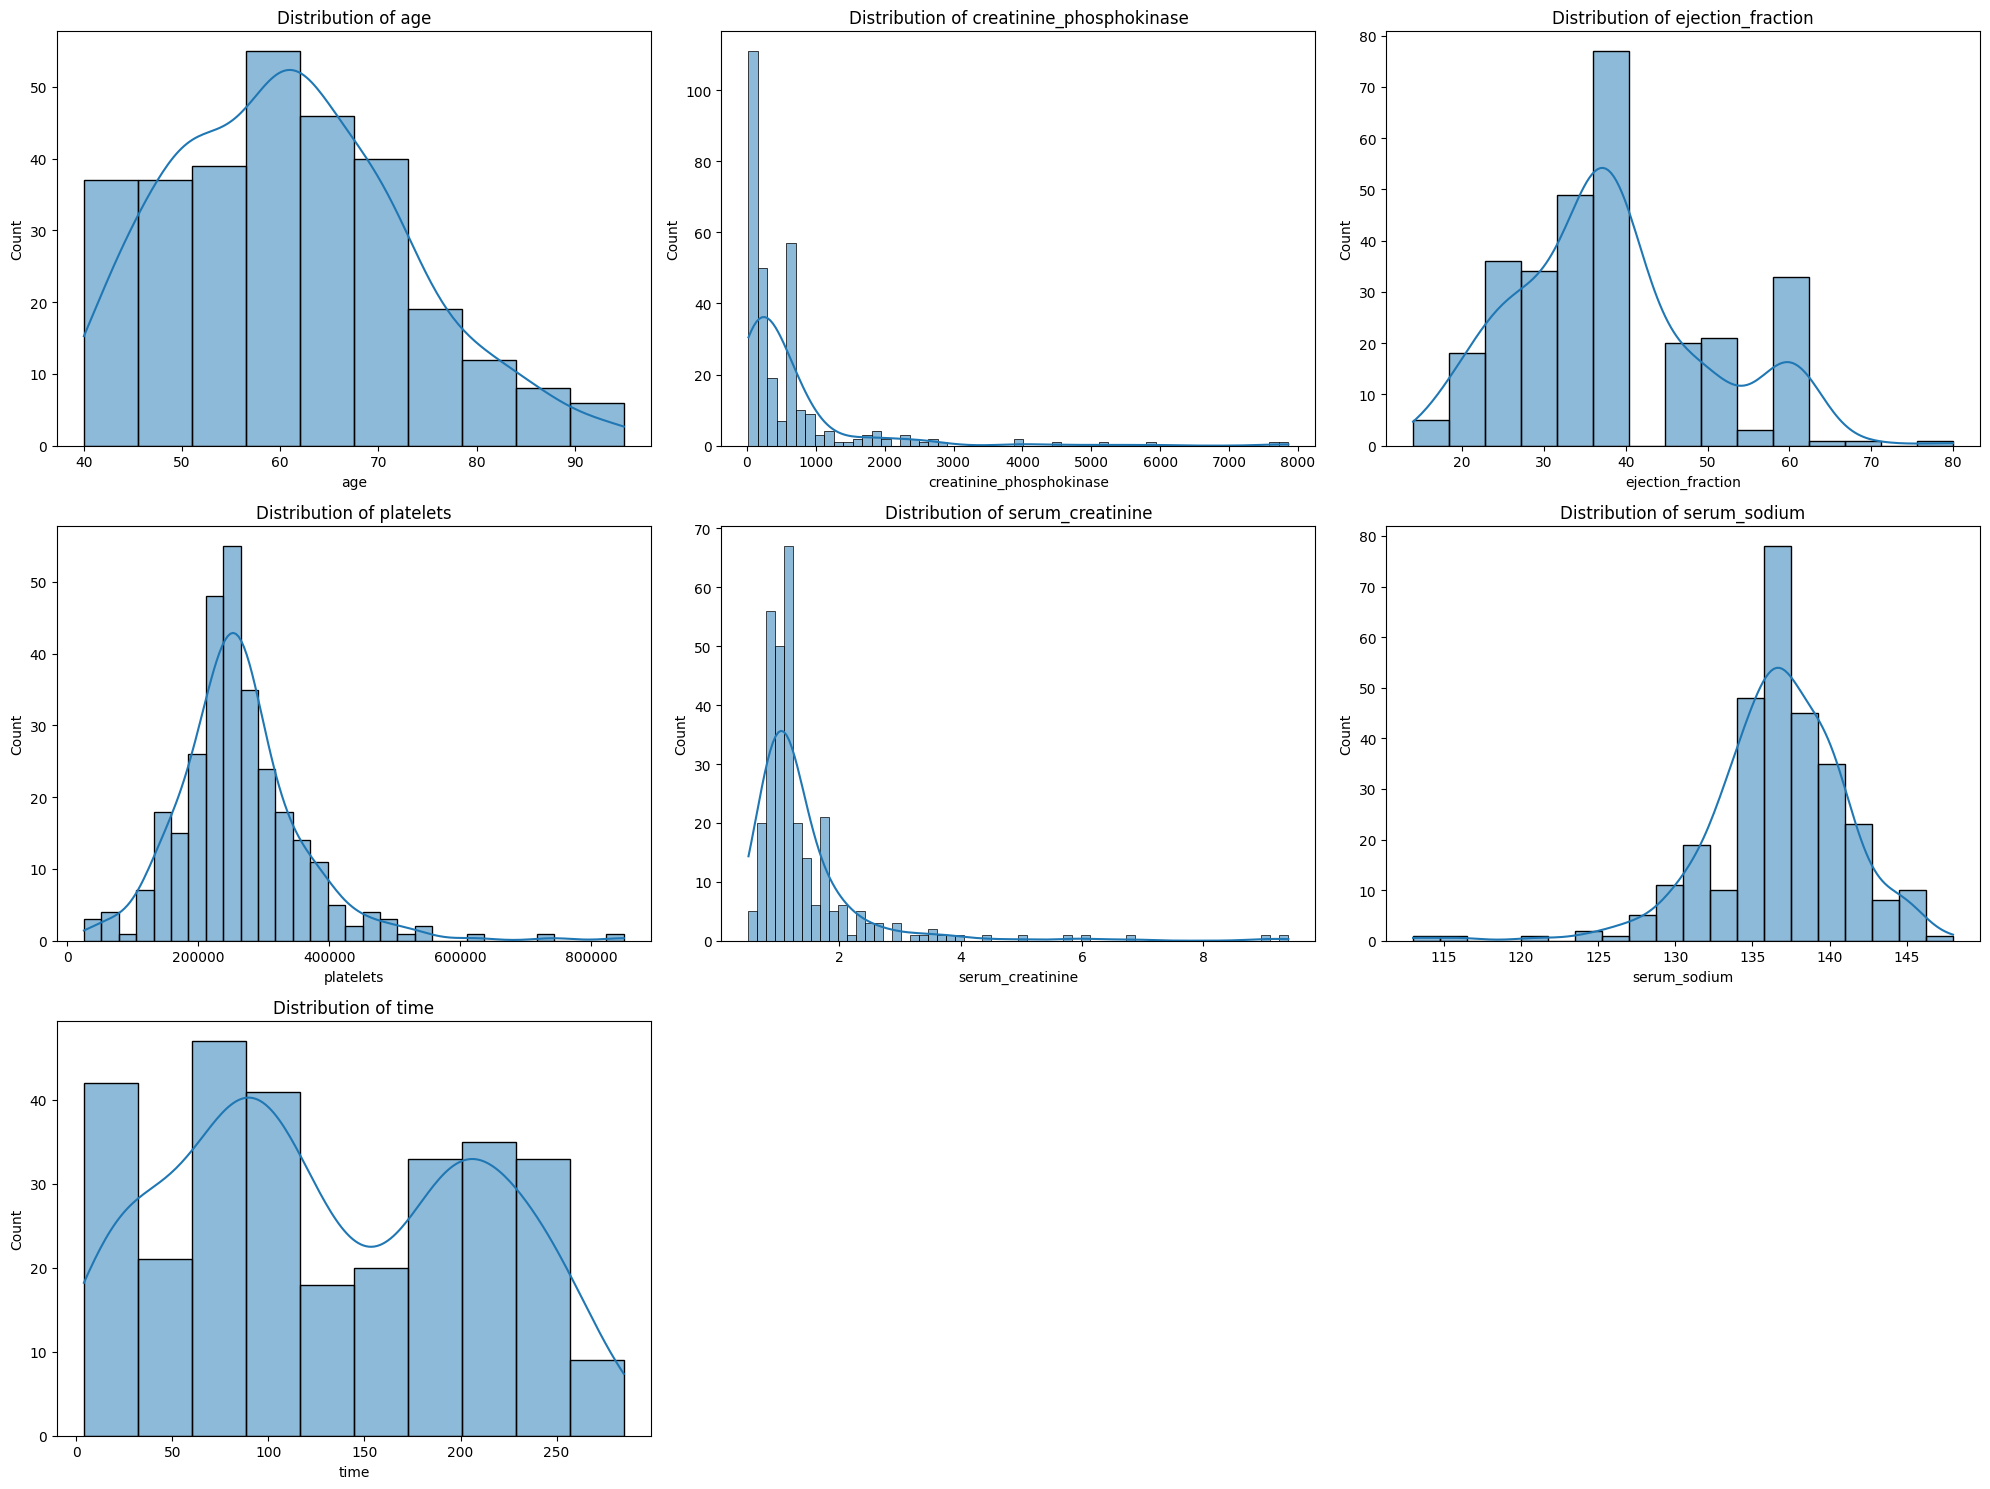

In [34]:
# TASK 5
continuous_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                  'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Plot histograms
plt.figure(figsize=(20, 15))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

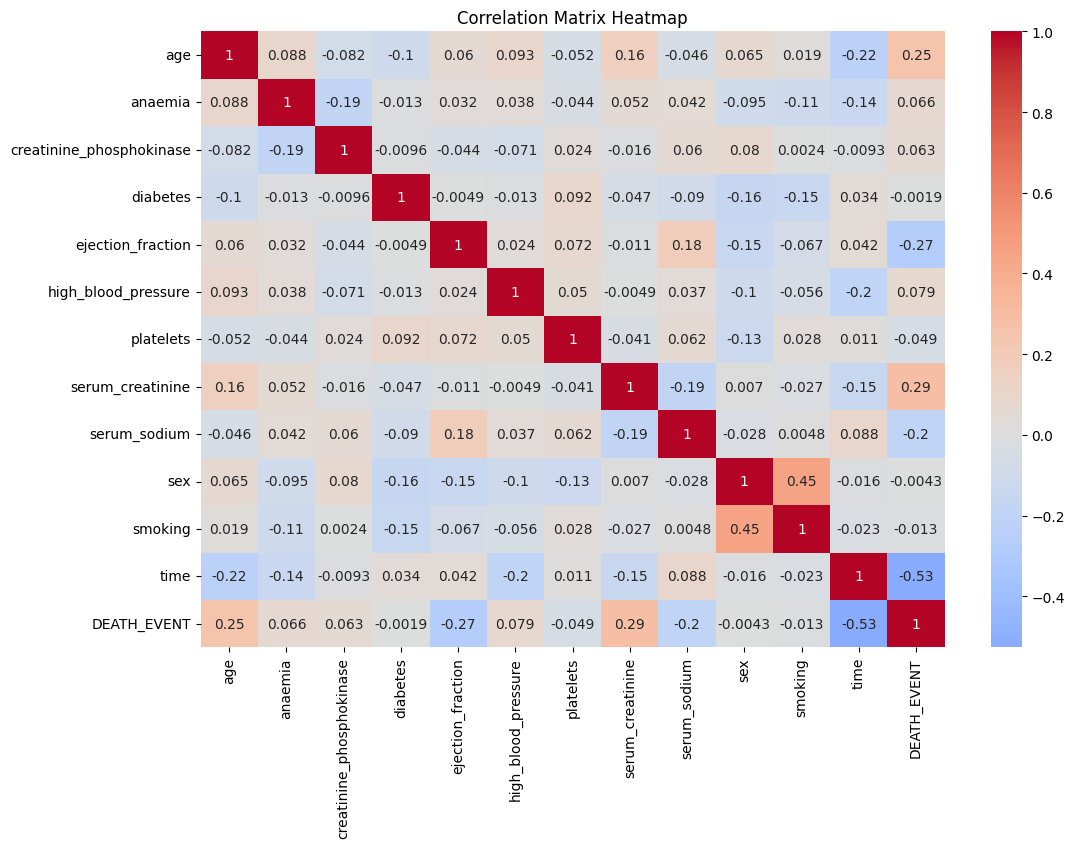

In [35]:
# TASK 6
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

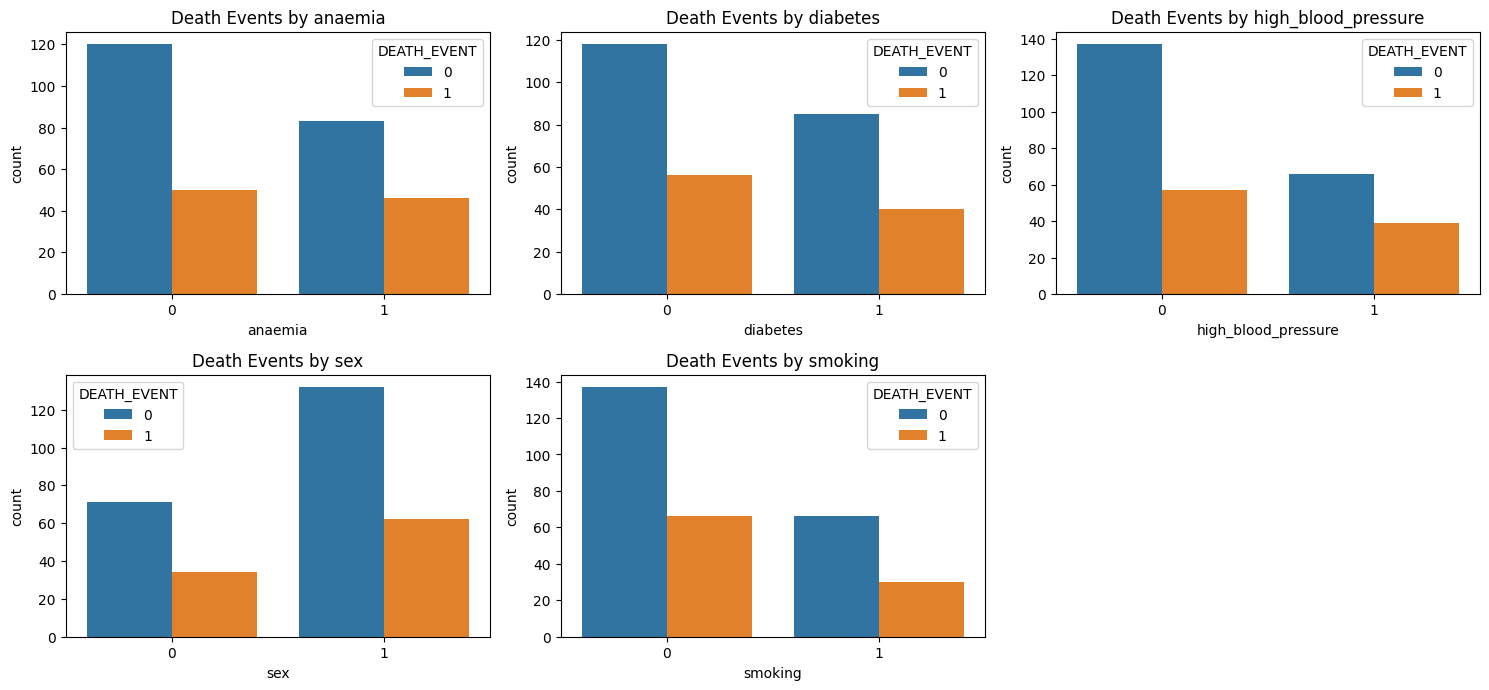

In [36]:
# TASK 7
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Plot countplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, hue='DEATH_EVENT', data=df)
    plt.title(f'Death Events by {var}')
plt.tight_layout()
plt.show()

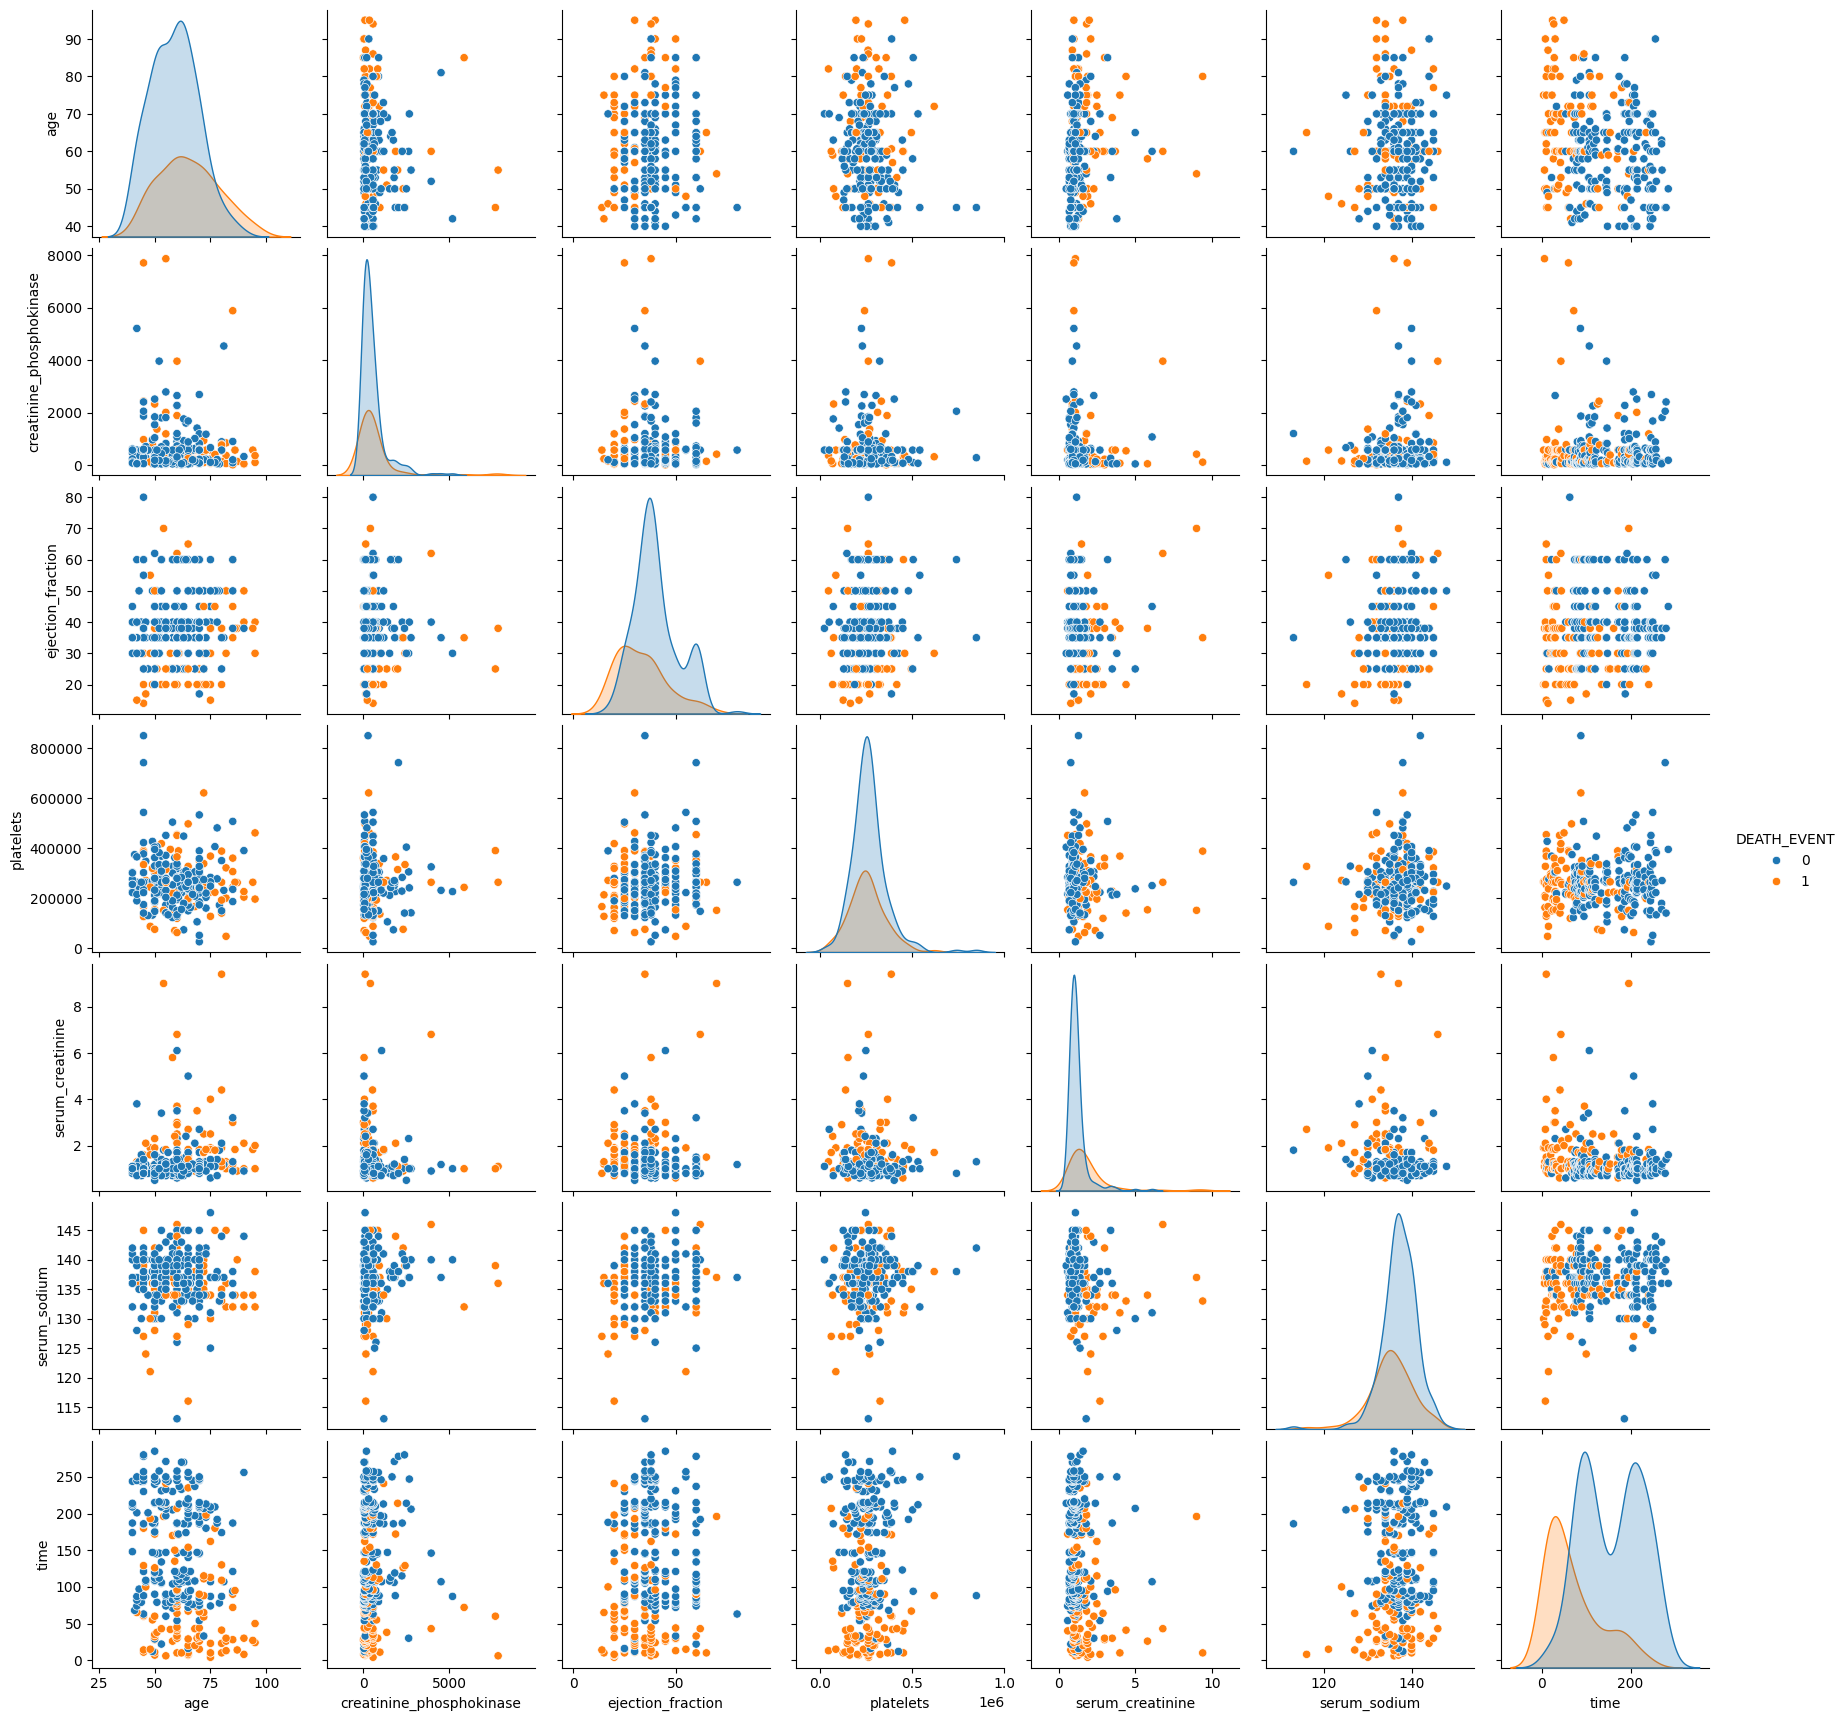

In [37]:
# TASK 8
sns.pairplot(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']], hue='DEATH_EVENT')
plt.show()

In [38]:
# TASK 9
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

In [39]:
# TASK 10
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [40]:
# TASK 11
continuous_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                      'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform on training data
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# Transform test data
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [43]:
# TASK 12
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


y_pred_log = log_reg.predict(X_test)


print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_log):.4f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8333
Precision: 0.7917
Recall: 0.6552
F1-score: 0.7170
Confusion Matrix:
[[56  5]
 [10 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        61
           1       0.79      0.66      0.72        29

    accuracy                           0.83        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90



In [45]:
# TASK 13
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)


print("KNN Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_knn):.4f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Performance:
Accuracy: 0.7556
Precision: 0.6667
Recall: 0.4828
F1-score: 0.5600
Confusion Matrix:
[[54  7]
 [15 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        61
           1       0.67      0.48      0.56        29

    accuracy                           0.76        90
   macro avg       0.72      0.68      0.70        90
weighted avg       0.75      0.76      0.74        90



In [46]:
# TASK 14
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)


print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_dt):.4f}")

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7889
Precision: 0.6923
Recall: 0.6207
F1-score: 0.6545
Confusion Matrix:
[[53  8]
 [11 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        61
           1       0.69      0.62      0.65        29

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.79        90



In [48]:
# TASK 15
from sklearn.model_selection import cross_val_score, KFold

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#Cross Validation
log_reg_cv = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(log_reg_cv, X_train, y_train, cv=kfold, scoring='accuracy')

print("K-Fold Cross Validation Scores (Logistic Regression):")
print(cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

K-Fold Cross Validation Scores (Logistic Regression):
[0.78571429 0.80952381 0.76190476 0.78571429 0.92682927]
Mean Accuracy: 0.8139
Standard Deviation: 0.0584


In [49]:
#TASK 16
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross validation
cv_scores_skf = cross_val_score(log_reg_cv, X_train, y_train, cv=skf, scoring='accuracy')

print("Stratified K-Fold Cross Validation Scores (Logistic Regression):")
print(cv_scores_skf)
print(f"Mean Accuracy: {cv_scores_skf.mean():.4f}")
print(f"Standard Deviation: {cv_scores_skf.std():.4f}")

Stratified K-Fold Cross Validation Scores (Logistic Regression):
[0.83333333 0.76190476 0.80952381 0.78571429 0.87804878]
Mean Accuracy: 0.8137
Standard Deviation: 0.0400


In [50]:
# Task 17
from sklearn.model_selection import GridSearchCV

# KNN hyperparameter tuning
knn_params = {
    'n_neighbors': range(3, 21, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("Best KNN Parameters:")
print(knn_grid.best_params_)
print(f"Best Score: {knn_grid.best_score_:.4f}")

# Decision Tree hyperparameter tuning
dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("\nBest Decision Tree Parameters:")
print(dt_grid.best_params_)
print(f"Best Score: {dt_grid.best_score_:.4f}")

Best KNN Parameters:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Score: 0.7657

Best Decision Tree Parameters:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.8038


Logistic Regression AUC: 0.8666
KNN AUC: 0.7654
Decision Tree AUC: 0.7448


<Figure size 800x600 with 0 Axes>

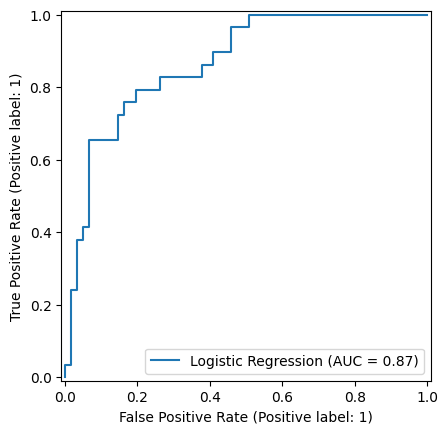

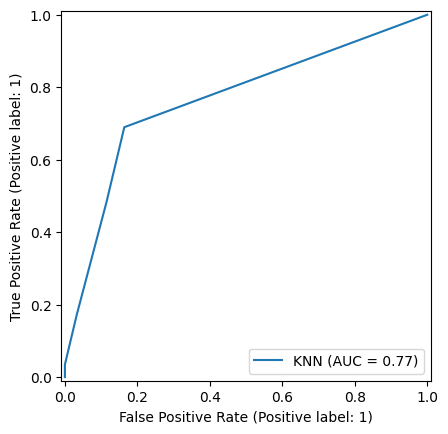

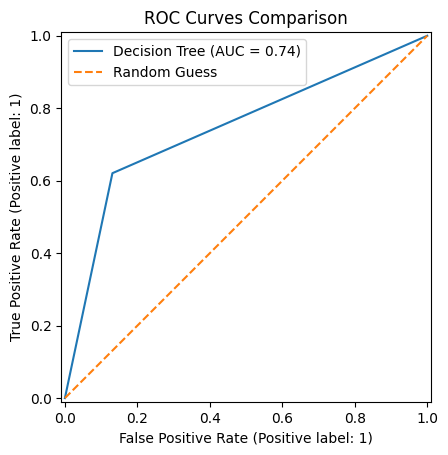

In [52]:
# Task 18
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

#predicted probabilities
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Calculate AUC scores
auc_log = roc_auc_score(y_test, y_prob_log)
auc_knn = roc_auc_score(y_test, y_prob_knn)
auc_dt = roc_auc_score(y_test, y_prob_dt)

print(f"Logistic Regression AUC: {auc_log:.4f}")
print(f"KNN AUC: {auc_knn:.4f}")
print(f"Decision Tree AUC: {auc_dt:.4f}")

# Plot ROC curves
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(log_reg, X_test, y_test, name='Logistic Regression')
RocCurveDisplay.from_estimator(knn, X_test, y_test, name='KNN')
RocCurveDisplay.from_estimator(dt, X_test, y_test, name='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.title('ROC Curves Comparison')
plt.legend()
plt.show()

Feature Importance from Logistic Regression:
                     Feature  Importance
7           serum_creatinine    0.904977
3                   diabetes    0.327481
1                    anaemia    0.306530
2   creatinine_phosphokinase    0.304282
0                        age    0.263429
10                   smoking    0.217762
6                  platelets   -0.082942
5        high_blood_pressure   -0.111409
8               serum_sodium   -0.116818
9                        sex   -0.148305
4          ejection_fraction   -0.850949
11                      time   -1.548643

Feature Importance from Decision Tree:
                     Feature  Importance
11                      time    0.543793
2   creatinine_phosphokinase    0.174005
7           serum_creatinine    0.090573
8               serum_sodium    0.057011
4          ejection_fraction    0.043687
6                  platelets    0.033213
0                        age    0.029893
3                   diabetes    0.014645
9            

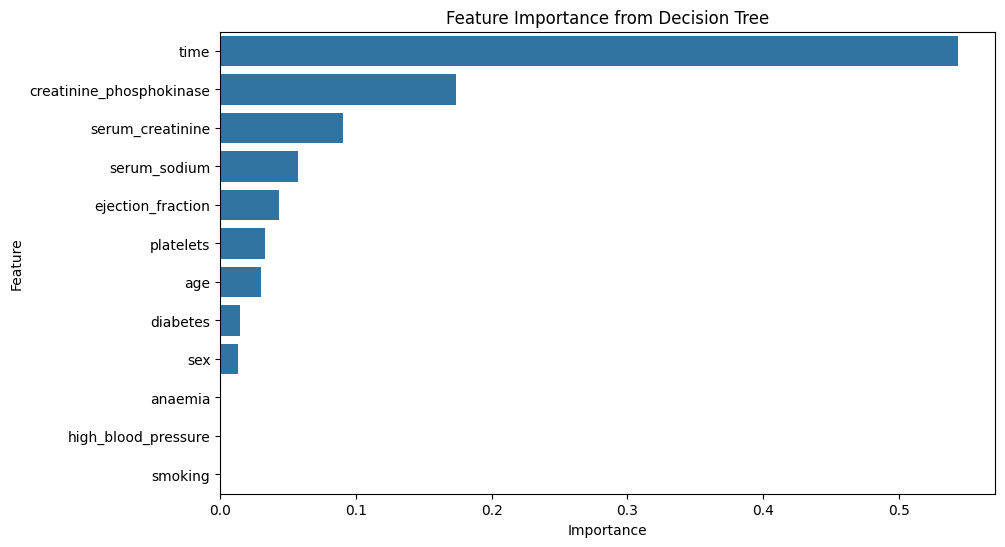

In [54]:
# Task 19
# importance from logistic regression
log_reg.fit(X_train, y_train)  # Re-fit on full training data
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_reg.coef_[0]
}).sort_values('Importance', ascending=False)

print("Feature Importance from Logistic Regression:")
print(feature_importance)

# importance for decision tree
dt.fit(X_train, y_train)  # Re-fit on full training data
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance from Decision Tree:")
print(dt_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance)
plt.title('Feature Importance from Decision Tree')
plt.show()